In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | taicheng
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | meulaboh
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | faya
Processing Record 11 of Set 1 | iraucuba
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | beringovskiy
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | kavaratti
Processing Record 2

Processing Record 34 of Set 4 | mocuba
Processing Record 35 of Set 4 | black river
Processing Record 36 of Set 4 | gold coast
Processing Record 37 of Set 4 | akropong
Processing Record 38 of Set 4 | normandin
Processing Record 39 of Set 4 | padang
Processing Record 40 of Set 4 | hay river
Processing Record 41 of Set 4 | hasaki
Processing Record 42 of Set 4 | am timan
Processing Record 43 of Set 4 | kinablangan
Processing Record 44 of Set 4 | bealanana
Processing Record 45 of Set 4 | palmer
Processing Record 46 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 4 | xining
Processing Record 48 of Set 4 | ojinaga
Processing Record 49 of Set 4 | ndele
Processing Record 50 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 5 | pokrovsk
Processing Record 2 of Set 5 | mendi
Processing Record 3 of Set 5 | san ramon de la nueva oran
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | faanui
Processing Record 6 of Set 5 |

Processing Record 25 of Set 8 | goderich
Processing Record 26 of Set 8 | fukue
Processing Record 27 of Set 8 | nemuro
Processing Record 28 of Set 8 | alice springs
Processing Record 29 of Set 8 | bintulu
Processing Record 30 of Set 8 | marawi
Processing Record 31 of Set 8 | dambulla
Processing Record 32 of Set 8 | klaksvik
Processing Record 33 of Set 8 | nguru
Processing Record 34 of Set 8 | olafsvik
Processing Record 35 of Set 8 | carolina
Processing Record 36 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 37 of Set 8 | axixa do tocantins
City not found. Skipping...
Processing Record 38 of Set 8 | brigantine
Processing Record 39 of Set 8 | visby
Processing Record 40 of Set 8 | salinopolis
Processing Record 41 of Set 8 | elko
Processing Record 42 of Set 8 | conneaut
Processing Record 43 of Set 8 | almaznyy
Processing Record 44 of Set 8 | hohhot
Processing Record 45 of Set 8 | amaraji
Processing Record 46 of Set 8 | berdigestyakh
Processing Record 47 of Set 8 | ka

Processing Record 13 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 14 of Set 12 | wenzhou
Processing Record 15 of Set 12 | dubbo
Processing Record 16 of Set 12 | gdov
Processing Record 17 of Set 12 | makakilo city
Processing Record 18 of Set 12 | bathsheba
Processing Record 19 of Set 12 | yar-sale
Processing Record 20 of Set 12 | lufilufi
Processing Record 21 of Set 12 | les cayes
Processing Record 22 of Set 12 | surt
Processing Record 23 of Set 12 | donskoye
Processing Record 24 of Set 12 | indramayu
Processing Record 25 of Set 12 | jujuy
City not found. Skipping...
Processing Record 26 of Set 12 | toliary
City not found. Skipping...
Processing Record 27 of Set 12 | ouro preto do oeste
Processing Record 28 of Set 12 | berlevag
Processing Record 29 of Set 12 | jibuti
Processing Record 30 of Set 12 | qasigiannguit
Processing Record 31 of Set 12 | fort-shevchenko
Processing Record 32 of Set 12 | inverell
Processing Record 33 of Set 12 | teya
Processing Record 3

In [22]:
len(city_data)

552

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taicheng,38.7310,113.2280,27.45,35,0,5.41,CN,2021-11-23 21:57:44
1,Cape Town,-33.9258,18.4232,64.11,63,0,24.16,ZA,2021-11-23 21:57:01
2,Barrow,71.2906,-156.7887,-6.14,95,100,8.95,US,2021-11-23 21:57:45
3,Arraial Do Cabo,-22.9661,-42.0278,76.96,83,0,12.66,BR,2021-11-23 21:57:45
4,Meulaboh,4.1363,96.1285,76.42,86,100,5.06,ID,2021-11-23 21:57:46
5,Busselton,-33.6500,115.3333,52.05,75,1,7.40,AU,2021-11-23 21:57:46
6,Saint-Philippe,-21.3585,55.7679,73.22,77,64,11.16,RE,2021-11-23 21:57:46
7,Chuy,-33.6971,-53.4616,58.66,64,0,8.93,UY,2021-11-23 21:57:47
8,Faya,18.3851,42.4509,55.92,30,18,5.46,SA,2021-11-23 21:57:47
9,Iraucuba,-3.7461,-39.7833,82.74,63,99,7.16,BR,2021-11-23 21:57:47


In [25]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taicheng,CN,2021-11-23 21:57:44,38.7310,113.2280,27.45,35,0,5.41
1,Cape Town,ZA,2021-11-23 21:57:01,-33.9258,18.4232,64.11,63,0,24.16
2,Barrow,US,2021-11-23 21:57:45,71.2906,-156.7887,-6.14,95,100,8.95
3,Arraial Do Cabo,BR,2021-11-23 21:57:45,-22.9661,-42.0278,76.96,83,0,12.66
4,Meulaboh,ID,2021-11-23 21:57:46,4.1363,96.1285,76.42,86,100,5.06
5,Busselton,AU,2021-11-23 21:57:46,-33.6500,115.3333,52.05,75,1,7.40
6,Saint-Philippe,RE,2021-11-23 21:57:46,-21.3585,55.7679,73.22,77,64,11.16
7,Chuy,UY,2021-11-23 21:57:47,-33.6971,-53.4616,58.66,64,0,8.93
8,Faya,SA,2021-11-23 21:57:47,18.3851,42.4509,55.92,30,18,5.46
9,Iraucuba,BR,2021-11-23 21:57:47,-3.7461,-39.7833,82.74,63,99,7.16


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

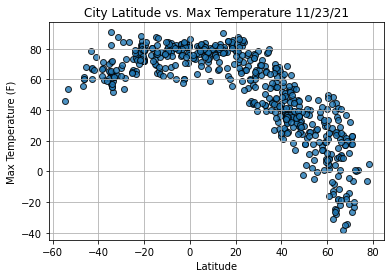

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

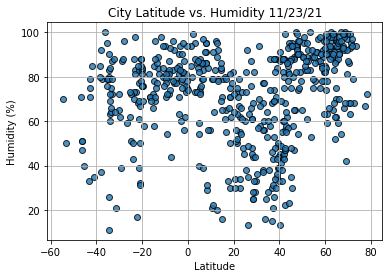

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

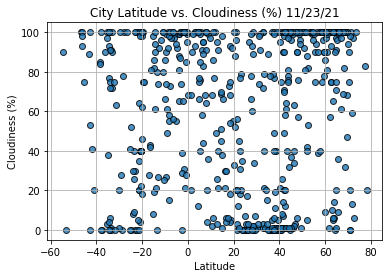

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

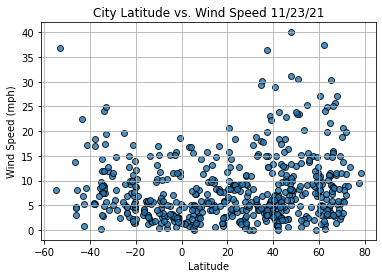

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()